<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/S_04/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [4]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/S_04/Salary_Data.csv'
dataset = pd.read_csv(fp)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# print(X,y,sep='\n')

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


## Visualising the Training set results

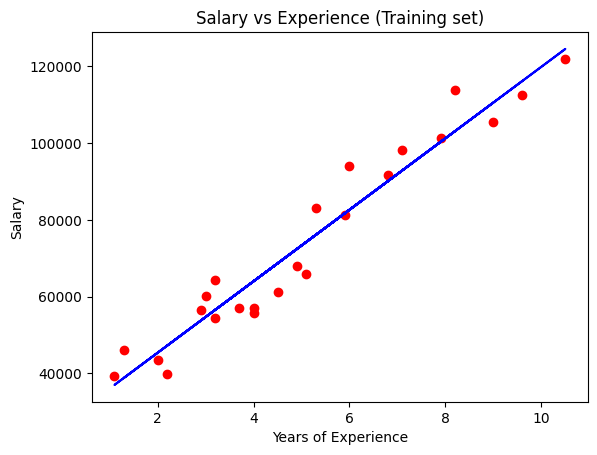

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**bold text**## Visualising the Test set results

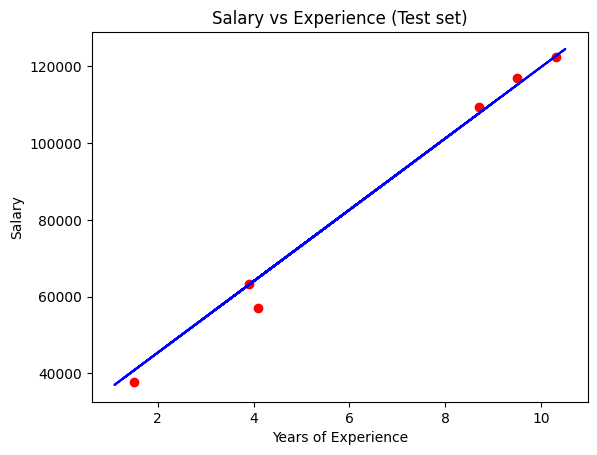

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

##Post hoc
make prediction in 2d np array
get scores: $R^2$, intercept (bias) and coefficient (weight)


In [8]:
# make a single prediction, based on year in 2d np array
years=[[15]]
prediction = regressor.predict(years)
print(prediction)

[166468.72605157]


In [ ]:
# get scores

regressor.score(X_test,y_test)

0.988169515729126

In [ ]:
# intercept (bias) and coefficient (weight)
b0=regressor.intercept_
w1=regressor.coef_

print('bias:',b0)
print('weight:',w1)

bias: 26780.09915062818
weight: [9312.57512673]


Regression model: $y=b0 +w1x$




In [ ]:
regressor.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Residual analysis

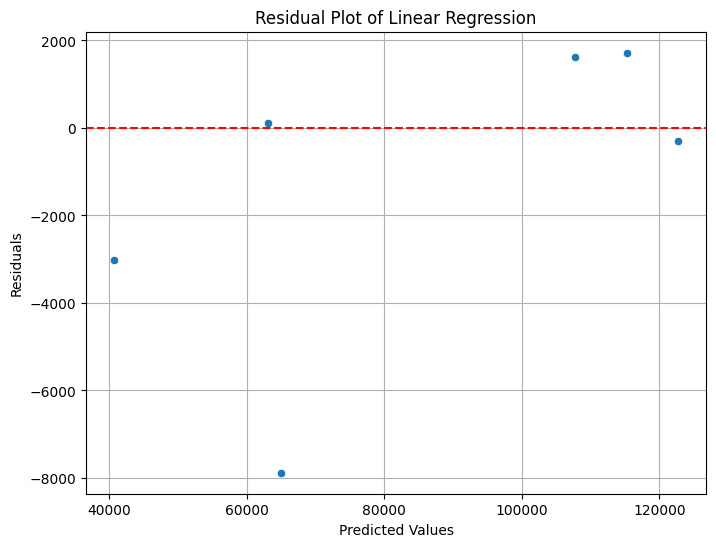

In [9]:
# Calculate residuals
residuals = y_test - y_pred

 # Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of Linear Regression")
plt.grid(True)
plt.show()

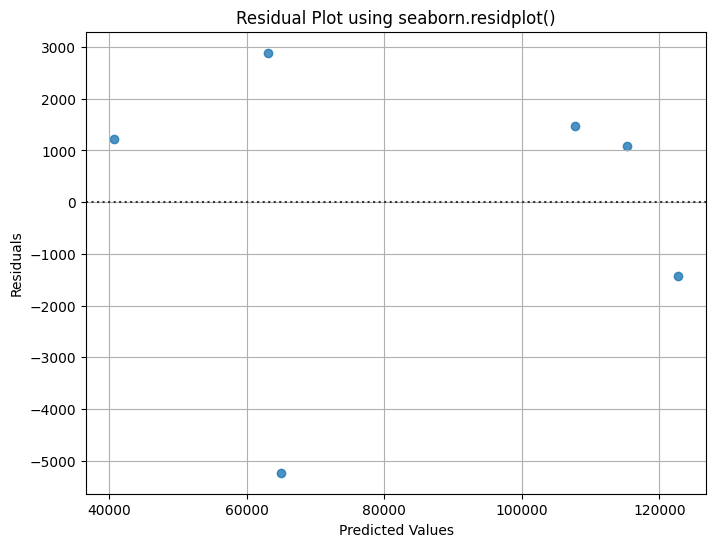

In [10]:
# Seaborn (previous steps to define X, y, model, and make predictions) ...

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred.flatten(), y=y_test.flatten()) # x is predicted, y is observed
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot using seaborn.residplot()")
plt.grid(True)
plt.show()